# Sky Huang

## Research question/interests

**I want to look at the effects of large bodies of water on the air quality, by looking at the level of CO, CO2, NO2, and other chemicals such as benzene** at both coastal and landlocked metro areas and comparing them. Furthermore, I will check if asthma levels are significantly different across these two categories. Additionally, I will try to control other variables by only comparing metro areas of similar size.I plan to filter the data to isolate coastal and landlocked metro areas, and then compare the air quality levels of these two groups.

## Plan 
1. Filter the data to isolate coastal and landlocked metro areas
2. look for collation between air quality and asthma levels in each group individually
3. check for collation between air quality and asthma levels in both groups combined
4. Analyze the data to see if there is a significant difference in air quality between the two groups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geoplot as gplt

aqi = pd.concat(pd.read_csv(f"../data/raw/annual_aqi_by_cbsa_{year}.csv") for year in range(2011, 2023))

# aqi2011 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2011.csv")
# aqi2012 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2012.csv")
# aqi2013 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2013.csv")
# aqi2014 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2014.csv")
# aqi2015 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2015.csv")
# aqi2016 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2016.csv")
# aqi2017 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2017.csv")
# aqi2018 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2018.csv")
# aqi2019 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2019.csv")
# aqi2020 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2020.csv")
# aqi2021 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2021.csv")
# aqi2022 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2022.csv")

concentration = pd.concat(pd.read_csv(f"../data/raw/annual_conc_by_monitor_{year}.csv") for year in range(2011, 2023))
# concentration2011= pd.read_csv("../data/raw/annual_conc_by_monitor_2011.csv")
# concentration2012= pd.read_csv("../data/raw/annual_conc_by_monitor_2012.csv")
# concentration2013= pd.read_csv("../data/raw/annual_conc_by_monitor_2013.csv")
# concentration2014= pd.read_csv("../data/raw/annual_conc_by_monitor_2014.csv")
# concentration2015= pd.read_csv("../data/raw/annual_conc_by_monitor_2015.csv")
# concentration2016= pd.read_csv("../data/raw/annual_conc_by_monitor_2016.csv")
# concentration2017= pd.read_csv("../data/raw/annual_conc_by_monitor_2017.csv")
# concentration2018= pd.read_csv("../data/raw/annual_conc_by_monitor_2018.csv")
# concentration2019= pd.read_csv("../data/raw/annual_conc_by_monitor_2019.csv")
# concentration2020= pd.read_csv("../data/raw/annual_conc_by_monitor_2020.csv")
# concentration2021= pd.read_csv("../data/raw/annual_conc_by_monitor_2021.csv")
# concentration2022= pd.read_csv("../data/raw/annual_conc_by_monitor_2022.csv")

combined = concentration.merge(
    aqi, how="inner", left_on=["Year", "CBSA Name"], right_on=["Year", "CBSA"]
).drop(columns=["CBSA"])
map = gpd.read_file("./ungraded/cb_2018_us_cbsa_500k/cb_2018_us_cbsa_500k.shp")
conbycdsa = combined.groupby(["CBSA Name"])["Median AQI"].mean()
mapcon= map.merge(conbycdsa, how="left", left_on="NAME", right_on=conbycdsa.index)
# mapcon.drop(columns=["CSAFP", 
#         "State Code",
#         "County Code",
#         "Local Site Name",
#         "Address",
#         "Latitude",
#         "Longitude",
#         "Datum",
#         "1st Max Non Overlapping Value",
#         "1st NO Max DateTime",
#         "2nd Max Non Overlapping Value",
#         "2nd NO Max DateTime",
#         "Date of Last Change",
#         "Sample Duration",
#         "Site Num",
#         "Pollutant Standard",
#         "Certification Indicator",
#         "Completeness Indicator",
#         "Parameter Code",
#         "1st Max DateTime",
#         "1st Max Value",
#         "2nd Max DateTime",
#         "2nd Max Value",
#         "3rd Max DateTime",
#         "3rd Max Value",
#         "4th Max DateTime",
#         "4th Max Value",
#         "Method Name",], inplace=True)
mapcon

,CSAFP,CBSAFP,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,Median AQI
0,NaN,31340,310M400US31340,31340,"Lynchburg, VA",M1,5491925729,68559452,"POLYGON ((-79.85840 37.26715, -79.85660 37.268...",28.518750
1,488,42220,310M400US42220,42220,"Santa Rosa, CA",M1,4081491107,497455304,"POLYGON ((-123.53354 38.76841, -123.52851 38.7...",34.937304
2,NaN,24900,310M400US24900,24900,"Greenwood, MS",M2,3165909249,48172332,"POLYGON ((-90.45376 33.27625, -90.45310 33.328...",NaN
3,538,46140,310M400US46140,46140,"Tulsa, OK",M1,16238554204,492994165,"POLYGON ((-97.06448 36.68106, -97.06411 36.684...",48.369019
4,NaN,18260,310M400US18260,18260,"Cookeville, TN",M2,2960951070,35466926,"POLYGON ((-85.84648 36.28817, -85.83735 36.341...",29.324786
...,...,...,...,...,...,...,...,...,...,...
940,288,13060,310M400US13060,13060,"Bay City, TX",M2,2830586734,1345801267,"POLYGON ((-96.37833 28.39078, -96.36755 28.440...",NaN
941,NaN,48300,310M400US48300,48300,"Wenatchee, WA",M1,12277658519,266186967,"POLYGON ((-121.18080 47.89849, -121.17723 47.9...",24.370107
942,314,35460,310M400US35460,35460,"Newport, TN",M2,1128782873,18734377,"POLYGON ((-83.31519 35.89332, -83.31078 35.895...",NaN
943,408,45860,310M400US45860,45860,"Torrington, CT",M2,2384116952,62334525,"POLYGON ((-73.51795 41.67086, -73.51678 41.687...",38.250977


<AxesSubplot: xlabel='Median AQI', ylabel='State Name'>

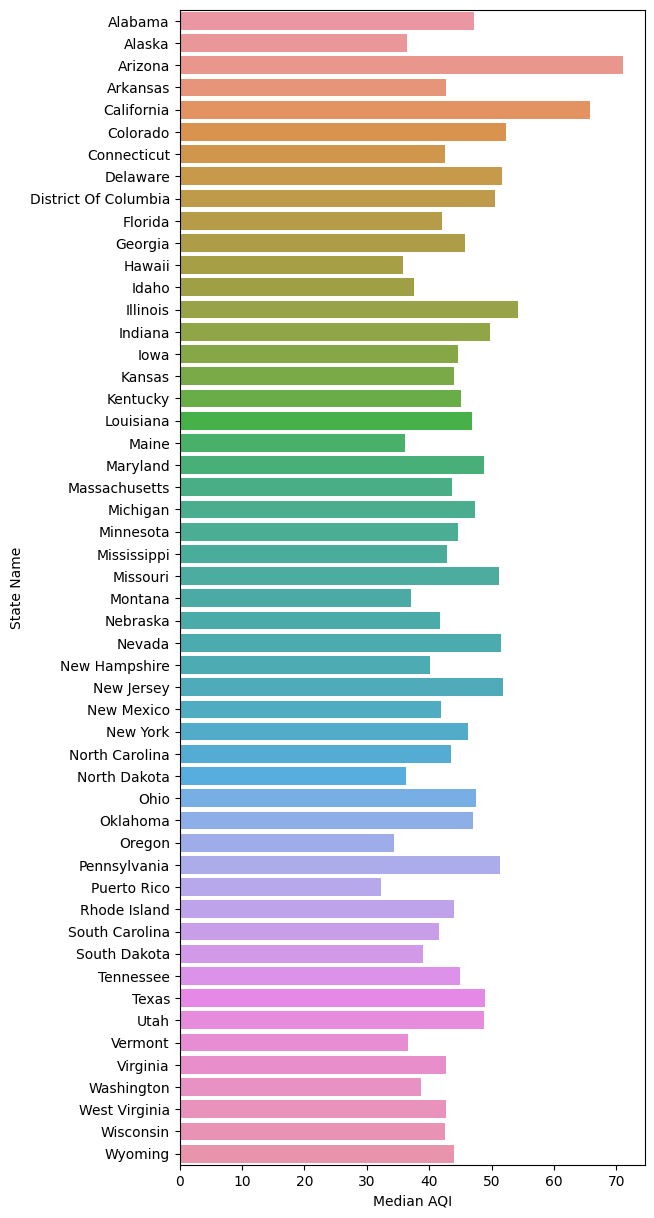

In [2]:
eda = combined.groupby(["State Name"])[["Max AQI","90th Percentile AQI","Median AQI"]].mean()
fig, ax = plt.subplots(figsize=(6, 15))
sns.barplot(data=eda, x="Median AQI", y=eda.index, ax=ax)

<AxesSubplot: xlabel='Median AQI', ylabel='State Name'>

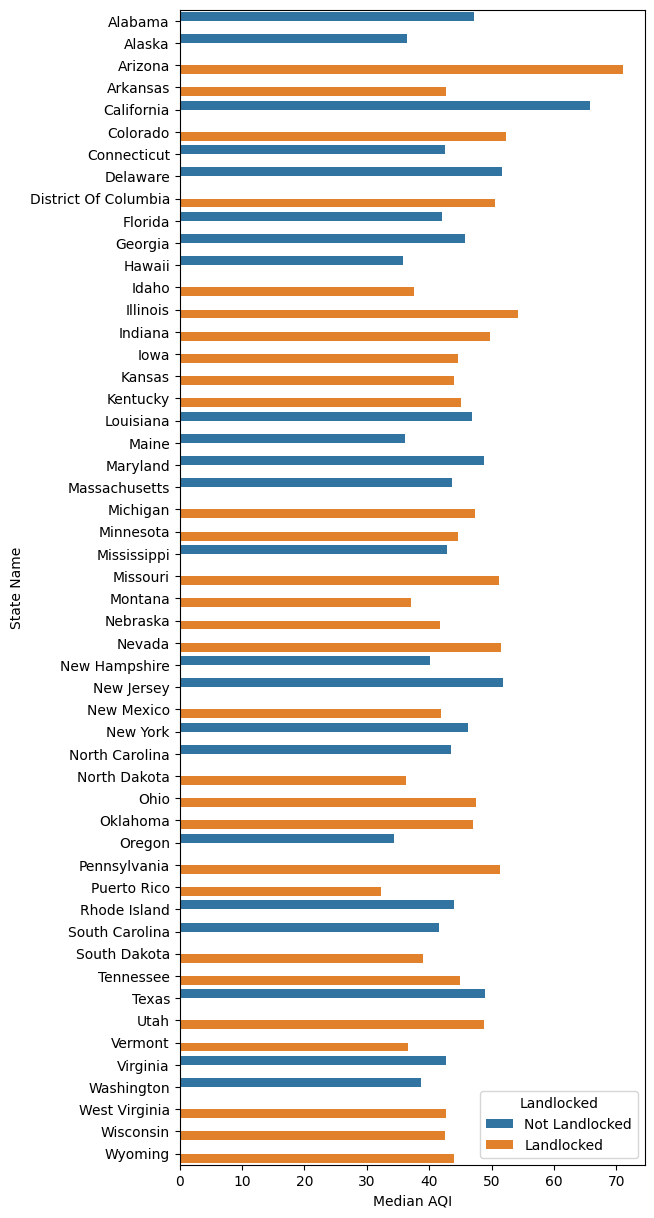

In [3]:
notlandlocked = ['Alaska', 'Hawaii', 'Washington', 'Oregon', 'California', 'Texas', 'Louisiana', 'Alabama', 'Florida', 'Georgia', 'South Carolina', 'North Carolina', 'Virginia', 'Maryland', 'Delaware', 'New Jersey', 'Mississippi', 'New York', 'Connecticut', 'Rhode Island', 'Massachusetts', 'New Hampshire', 'Maine']
li = []
for i in eda.index:
    landlocked = True
    if i in notlandlocked:
        landlocked = False
    if landlocked:
        li.append("Landlocked")
    else:
        li.append("Not Landlocked")
eda["Landlocked"] = li
fig, ax = plt.subplots(figsize=(6, 15))
sns.barplot(data=eda, x="Median AQI", y=eda.index, hue="Landlocked")

<AxesSubplot: >

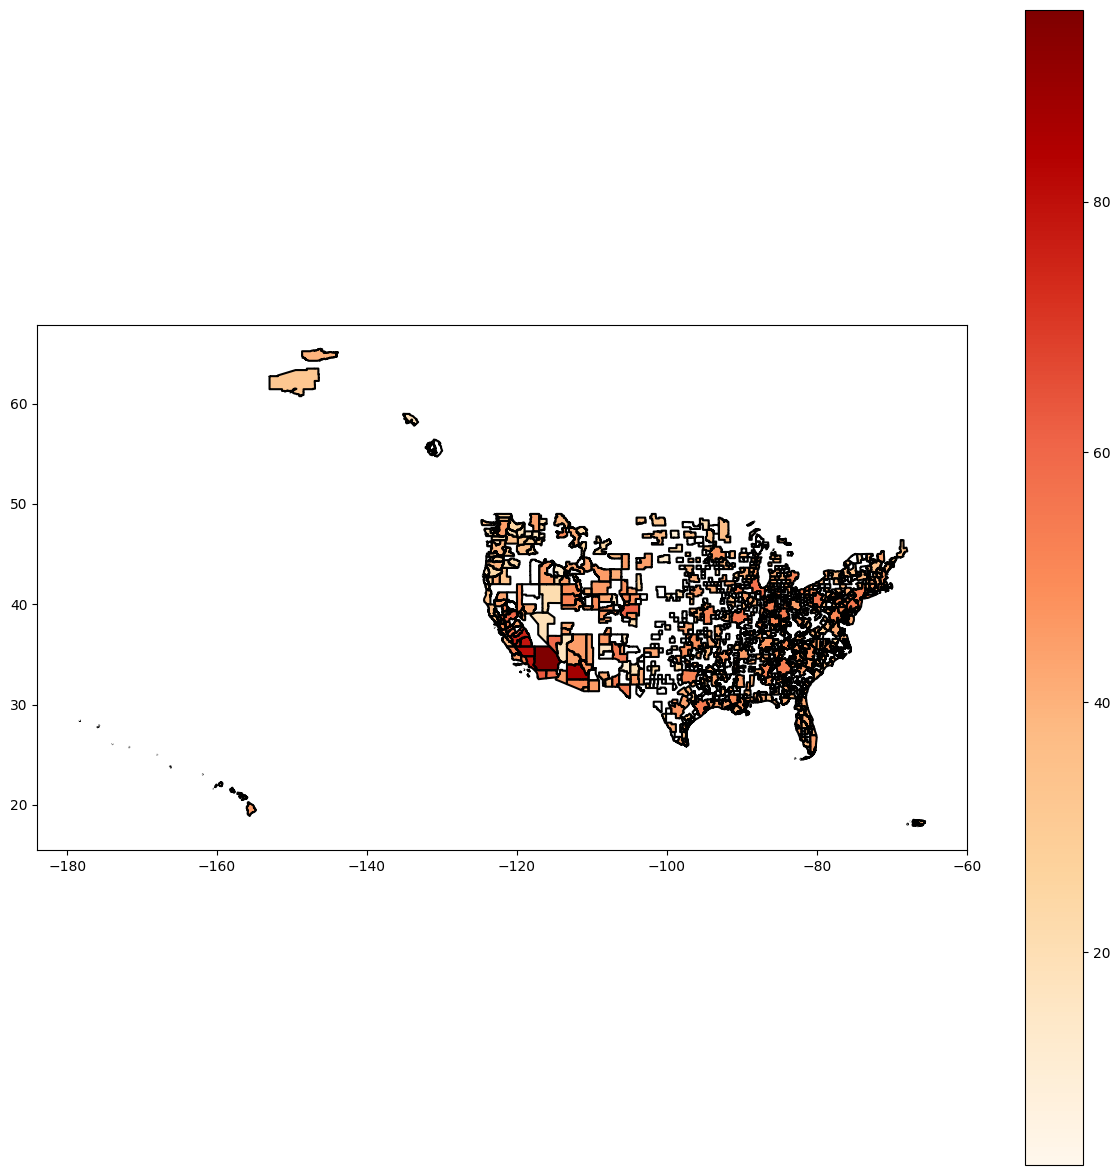

In [7]:
ax = mapcon.boundary.plot(figsize=(15, 15), color="black")
mapcon.plot(ax=ax, column="Median AQI", cmap="OrRd", legend=True)